In [11]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
# مصفوفات تقييم النموذج 
from sklearn.metrics import accuracy_score # تقوم بتقسم عدد التنبوءات الصحيحة على العدد الإجمالي للتنبوءات 
from sklearn.metrics import precision_score,recall_score,f1_score# تقيس توازن النموذج

import joblib
from tkinter import *

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('Churn Modeling.csv')

In [14]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [18]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
# إنشاء أعمدة للعناصر الأعمدة الحاوية على عناصر متقطعة 
data = pd.get_dummies(data)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [20]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

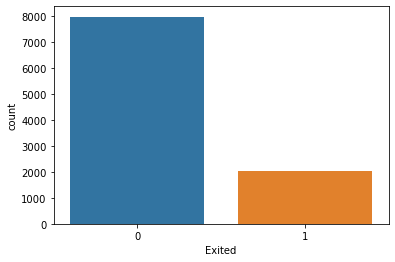

In [21]:
# نلاحظ أن قيم العامود المراد التنبوء به غير متوازنة من بعضها 
sns.countplot(data['Exited'])

In [22]:
X = data.drop('Exited',axis=1)
y = data['Exited']

X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [24]:
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 =log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8095

In [27]:
precision_score(y_test,y_pred1)

0.5928571428571429

In [28]:
recall_score(y_test,y_pred1)

0.20393120393120392

In [29]:
f1_score(y_test,y_pred1)

0.30347349177330896

In [30]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


# Smote

In [31]:
# هذه الطريقة تجعل عناصر العامود المراد التنبوء به متوازنة عن طريق زيادة عناصر العامود 
from imblearn.over_sampling import SMOTE # وجب تثبت المكتبة

In [32]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [33]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=1)

In [35]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
X_train

array([[ 0.41886244, -0.29316259,  0.80750131, ...,  2.15688987,
        -0.82050808,  1.19114829],
       [-1.90099662, -0.89605062,  0.07093893, ..., -0.46363053,
         1.21875703, -0.83952603],
       [ 0.75649451, -0.59460661, -1.40218581, ...,  2.15688987,
        -0.82050808,  1.19114829],
       ...,
       [-1.91188797,  1.2140575 ,  0.80750131, ..., -0.46363053,
        -0.82050808, -0.83952603],
       [ 1.25749694,  0.10876277,  0.43922012, ..., -0.46363053,
        -0.82050808,  1.19114829],
       [-0.15837948,  1.01309482, -1.03390462, ..., -0.46363053,
         1.21875703, -0.83952603]])

In [37]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 =log.predict(X_test)
a1 = accuracy_score(y_test,y_pred1)

In [40]:
precision_score(y_test,y_pred1)

0.8979151689432063

In [41]:
recall_score(y_test,y_pred1)

0.7560532687651331

In [42]:
f1_score(y_test,y_pred1)

0.8209004272099901

In [43]:
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
a2 = accuracy_score(y_test,y_pred2)

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
a3 = accuracy_score(y_test,y_pred3)

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)
a4 = accuracy_score(y_test,y_pred4)

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5 = rf.predict(X_test)
a5 = accuracy_score(y_test,y_pred5)

In [47]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)
a6 = accuracy_score(y_test,y_pred6)

In [48]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
                          'ACC':[a1,a2,a3,a4,a5,a6]})

<AxesSubplot:xlabel='Models', ylabel='ACC'>

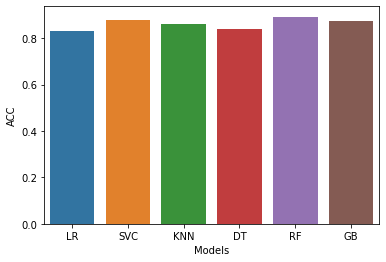

In [49]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [50]:
X_res = sc.fit_transform(X_res)
rf.fit(X_res,y_res)
X_res.shape


(15926, 13)

In [51]:
# حفظ النموذج 
joblib.dump(rf,'churn_predict_model')
model = joblib.load('churn_predict_model')

In [52]:
# إنشاء واجهة رسومية للنموذج 
def show():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = float(e8.get())
    p9 = int(e9.get())
    p10 = int(e10.get())
    p11 = int(e11.get())     
    p12 = int(e12.get())
    p13 = int(e13.get())
    model =joblib.load('churn_predict_model')
    # sc.transform تهجيم القيم قبل التنبؤء
    result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])) 
    
    Label(master, text = 'Churn').grid(row=14)
    Label(master,text=result[0]).grid(row=15)

master = Tk()
                       

master.title('Customers Prediction')
label = Label(master,text = 'Customers Prediction',bg = 'black',fg='white').grid(row=0,columnspan= 2)
Label(master,text='CreditScore').grid(row =1 )
Label(master,text='Age').grid(row =2 )
Label(master,text='Tenure').grid(row =3)
Label(master,text='Balance').grid(row =4 )
Label(master,text='NumOfProducts').grid(row =5 )
Label(master,text='HasCrCard').grid(row =6 )
Label(master,text='IsActiveMember').grid(row =7 )
Label(master,text='EstimatedSalary').grid(row =8 )
Label(master,text='Geography_France ').grid(row =9 )
Label(master,text='Geograph Germany').grid(row =10 )
Label(master,text='Geography spain ').grid(row =11 )
Label(master,text='Gender_Female').grid(row =12 )
Label(master,text='Gender_male').grid(row =13 )





e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)




e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)





Button(master,text='Predict',command=show).grid()

mainloop()